## Decision Trees

- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 
- The topmost node in a decision tree is known as the root node. 
- It learns to partition on the basis of the attribute value.
- It partitions the tree in recursively manner call __recursive partitioning__. 
- This flowchart-like structure helps you in decision making. 

- Decision Tree is a white box type of ML algorithm. 
- It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. 
- Its training time is faster compared to the neural network algorithm. 
- The time complexity of decision trees is a function of the number of records and number of attributes in the given data. 
- The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. 
- Decision trees can handle high dimensional data with good accuracy.


The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    1. All the tuples belong to the same attribute value.
    2. There are no more remaining attributes.
    3. There are no more instances.
    
    
<img src="images/decision_tress2.jpeg">

### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. In the case of a continuous-valued attribute, split points for branches also need to define. 
Types of Selection Measures:
1. Information Gain
2. Gain Ratio
3. Gini
4. Chi Square
5. Reduction in Variance

__Entropy__: Measure of disorder or measure of impurity. 
<img src="images/entropy.png">

Where ‘Pi’ is simply the frequentist probability of an element/class ‘i’ in our data.

Example, let’s say we only have two classes , a positive class and a negative class. Therefore ‘i’ here could be either + or (-). So if we had a total of 100 data points in our dataset with 30 belonging to the positive class and 70 belonging to the negative class then ‘P+’ would be 3/10 and ‘P-’ would be 7/10. Pretty straightforward.
If I was to calculate the entropy of my classes in this example using the formula above. Here’s what I would get.

<img src="images/entropy1.png" style="width: 400px;"/>

0.88 is considered a high entropy , a high level of disorder ( meaning low level of purity). Entropy is measured between 0 and 1.(Depending on the number of classes in your dataset, entropy can be greater than 1 but it means the same thing , a very high level of disorder.)

- Does it matter why entropy is measured using log base 2 or why entropy is measured between 0 and 1 and not some other range? No. It’s just a metric. It’s not important to know how it came to be. It’s important to know how to read it and what it tells us, which we just did above. Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.



__1. Information Gain__:Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

<img src="images/info_gain4.png" style="width: 400px;"/>

The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().


__2. Gain Ration__:Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info. Java implementation of the C4.5 algorithm is known as J48, which is available in WEKA data mining tool.

<img src="images/gain_ratio1.png">
Where,

- |Dj|/|D| acts as the weight of the jth partition.
- v is the number of discrete values in attribute A.
The gain ratio can be defined as:
<img src="images/gain_ratio2.png">

The attribute with the highest gain ratio is chosen as the splitting attribute.

__3. Gini__:Gini  says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

    - It works with categorical target variable “Success” or “Failure”.
    - It performs only Binary splits
    - Higher the value of Gini higher the homogeneity.
    - CART (Classification and Regression Tree) uses Gini method to create binary splits.
    
    Steps to Calculate Gini for a split
    - Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p^2+q^2).
    - Calculate Gini for split using weighted Gini score of each node of that split
    
 Gini Impurity = 1-Gini

__4.Chi-Square__: It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by sum of squares of standardized differences between observed and expected frequencies of target variable.

    - It works with categorical target variable “Success” or “Failure”.
    - It can perform two or more splits.
    - Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node.
    - Chi-Square of each node is calculated using formula,
    - Chi-square = ((Actual – Expected)^2 / Expected)^1/2
    - It generates tree called CHAID (Chi-square Automatic Interaction Detector)
    
    Steps to Calculate Chi-square for a split:
    - Calculate Chi-square for individual node by calculating the deviation for Success and Failure both
    - Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node of the split
    
__5.Reduction in Variance__:Reduction in variance is an algorithm used for continuous target variables (regression problems). This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population:
<img src="images/variance.png">

    Steps to calculate Variance:
    - Calculate variance for each node.
    - Calculate variance for each split as weighted average of each node variance.

### Key parameters of tree modeling 

Overfitting is one of the key challenges faced while modeling decision trees. If there is no limit set of a decision tree, it will give 100% accuracy on training set because in the worse case it will end up making 1 leaf for each observation. Thus, preventing overfitting is pivotal while modeling a decision tree and it can be done in 2 ways:

1. Setting constraints on tree size
2. Tree pruning

__1. Setting Constraints on Tree Size__
This can be done by using various parameters which are used to define a tree. 

    1. Minimum samples for a node split:
            - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
            - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
            - Too high values can lead to under-fitting hence, it should be tuned using cross-validation.
    2. Minimum samples for a terminal node (leaf): 
        - Defines the minimum samples (or observations) required in a terminal node or leaf.
        - Used to control over-fitting similar to min_samples_split.
        - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
    3. Maximum depth of tree:
        - It is defined by maximum depth of a tree.
        - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. Should be tuned using cross-validation.
    4. Maximum number of terminal nodes:
        - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    5. Maximum features to consider for split:
        - The number of features to consider while searching for a best split. These will be randomly selected.
        - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
        - Higher values can lead to over-fitting but depends on case to case.
        
__2. Tree Pruning__: 
    1. We first make the decision tree to a large depth.
    2. Then we start at the bottom and start removing leaves which are giving us negative returns when compared from the top.
    3. Suppose a split is giving us a gain of say -10 (loss of 10) and then the next split on that gives us a gain of 20. A simple decision tree will stop at step 1 but in pruning, we will see that the overall gain is +10 and keep both leaves.
    
Sklearn’s decision tree classifier does not currently support pruning. Advanced packages like xgboost have adopted tree pruning in their implementation. 

In [1]:
import pandas as pd
import datetime
import numpy as np

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('Data Files/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data.columns = col_names
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = data[feature_cols] 
# Target variable
y = data.label 

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


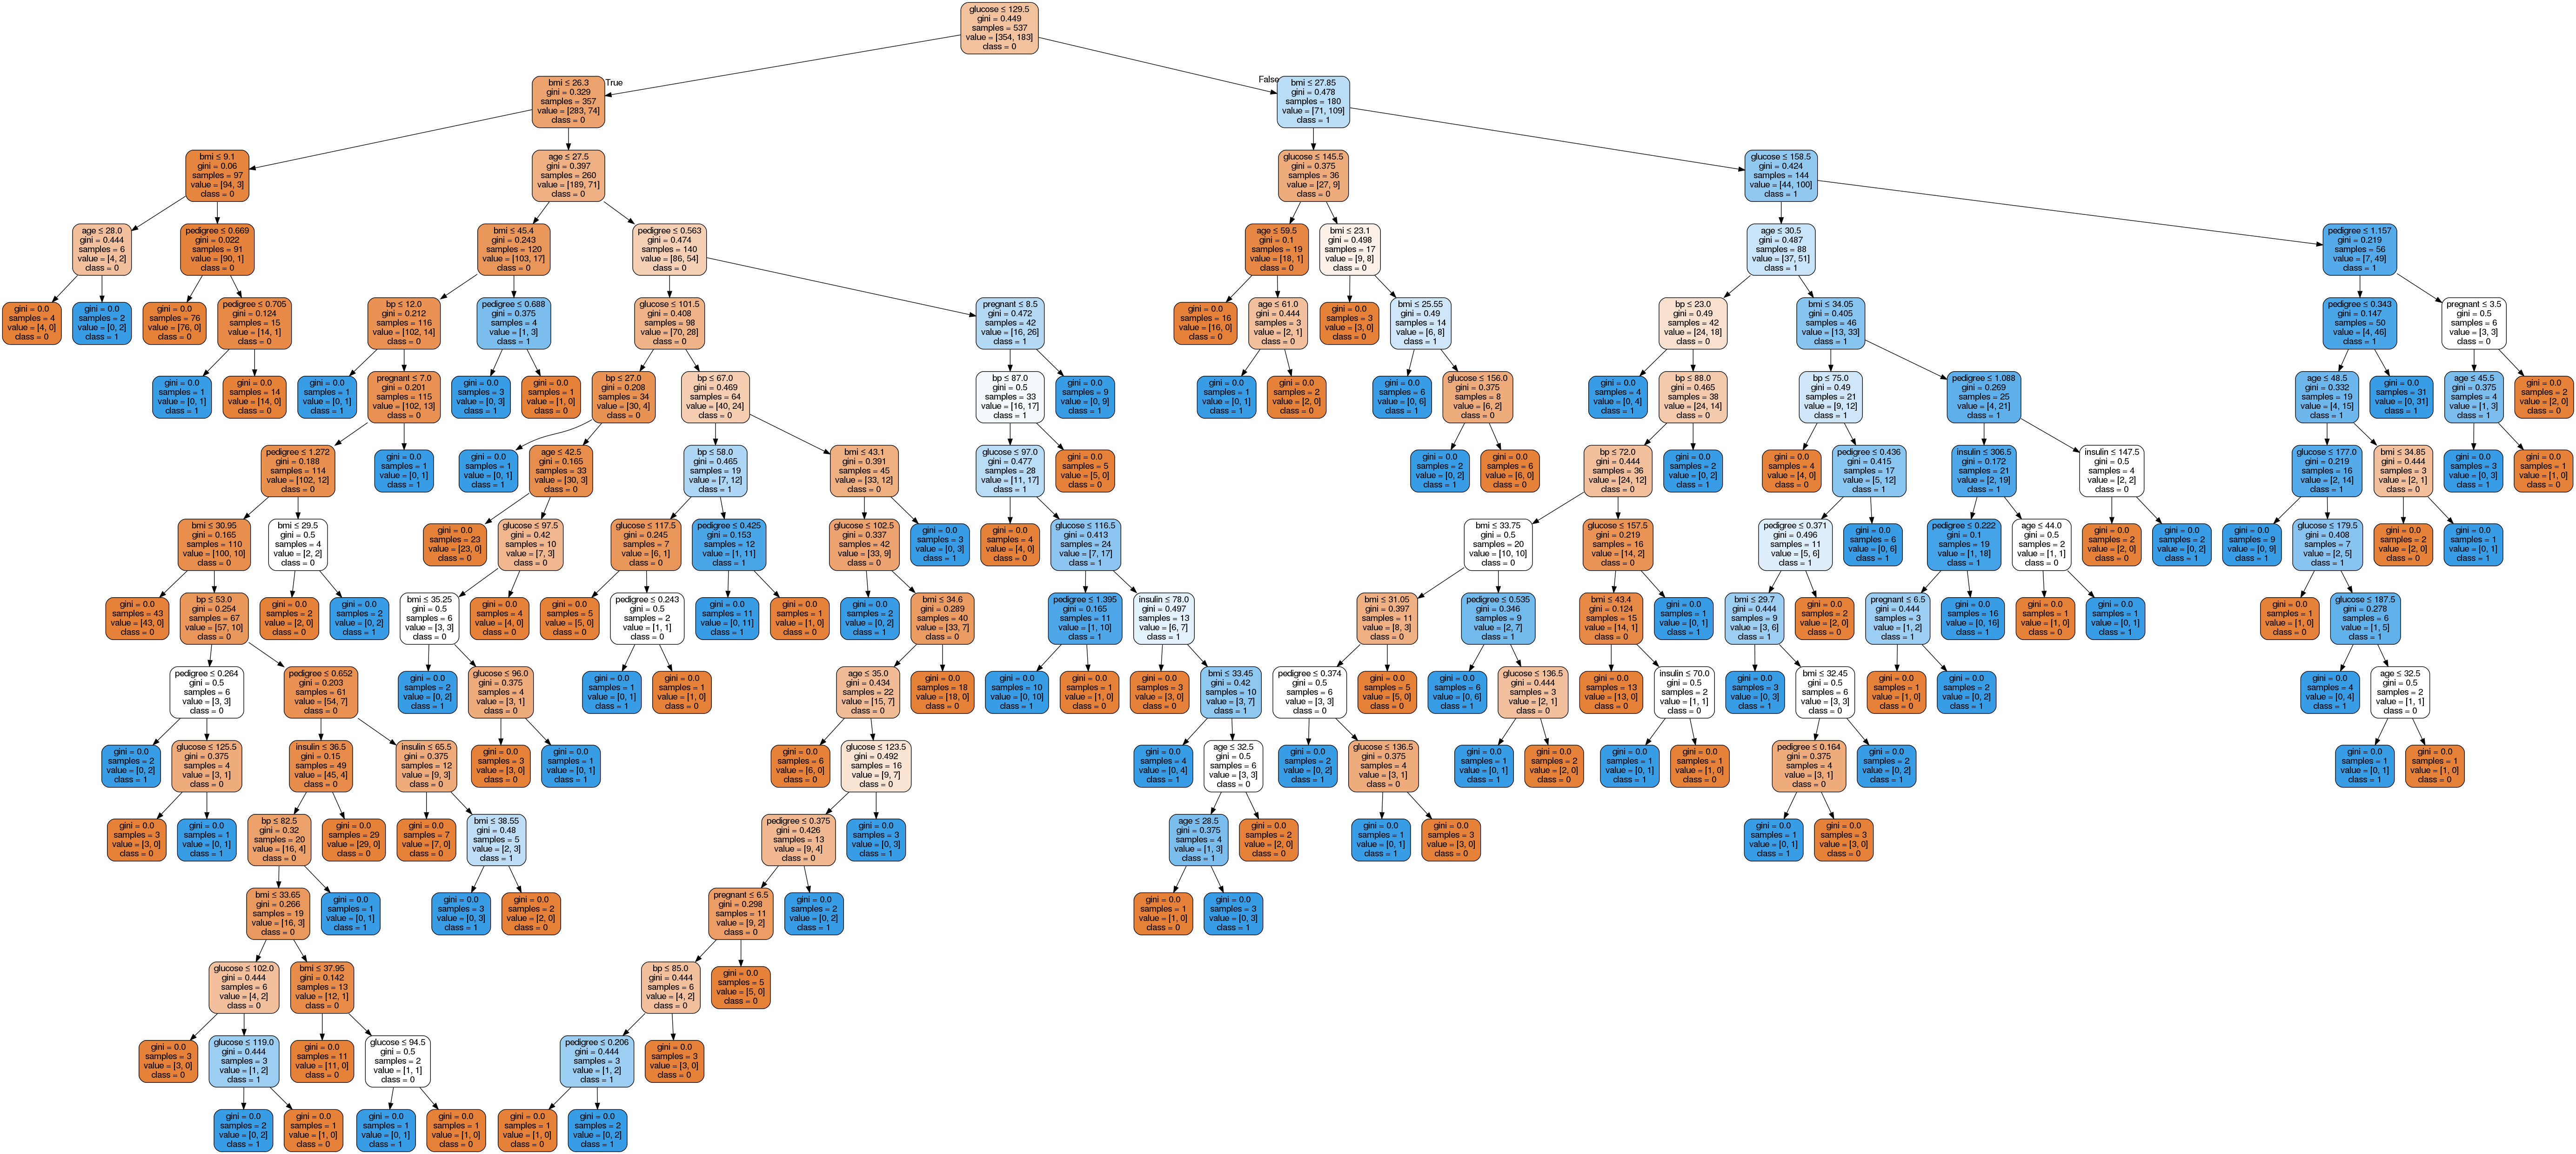

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Optimizing Decision Tree Performance

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


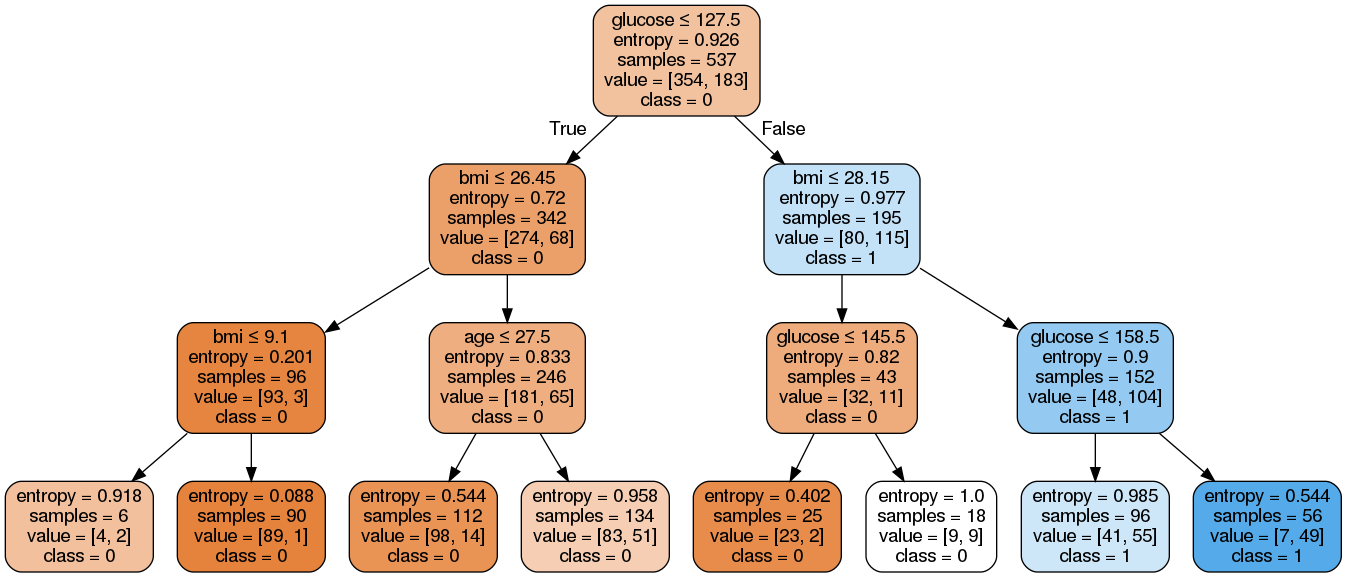

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)
### Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.